In [223]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_pickle('Recipes_data_Cuisines_Sim_Ingrs.pkl')

In [86]:
df.Ingredients[0]

['parsley flakes', 'cracked wheat bulgur', 'salt', 'garlic', 'lemon juice']

In [224]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))
df

,Title,Ingredients,Type
0,Easy Garlicky Tabouli,cracked wheat bulgur lemon garlic salt parsley...,Africa & Middle East
1,Hummus Ii,coriander oregano lemon parsley sprigs sunflow...,Africa & Middle East
2,Spiced Baba Gannouj,green bell peppers allspice eggplant olive oil...,Africa & Middle East
3,African Spiced Carrots,coriander carrots lemon garlic paprika cumin c...,Africa & Middle East
4,Alton Brown's Tzatziki Sauce,kosher salt garlic olive oil red wine vinegar ...,Africa & Middle East
...,...,...,...
2958,Mom's Spanish Rice,rice soy sauce dark ground ham vegetable oil t...,Mexican
2959,Mona's Acapulco Chicken,oregano black pepper chicken cheddar cheese mu...,Mexican
2960,Monterey Tortilla Casserole,black olives turkey green bell peppers tortill...,Mexican
2961,Moo Shoo Pork in Tortillas,teriyaki sauce cornstarch broccoli slaw hoisin...,Mexican


In [225]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Title,Ingredients,Type
0,Buzzard's Breath Chili,oregano cornstarch garlic cumin beef suet hot ...,Mexican
1,Dill Hollandaise Sauce,lemon dill seed water butter salt egg yolks,European
2,Basmati Rice,salt basmati rice vegetables curry powder,Indian
3,Smoked Salmon Cream Cheese Soufflé,egg whites smoked ham bread crumbs black peppe...,European
4,Chicken & Chilies Casserole,cream of mushroom soup tortilla chips evaporat...,Mexican
...,...,...,...
2958,Pappa Al Pomodoro,stock salt and black pepper bread garlic olive...,European
2959,Lentil and Rice Soup,curry powder coriander chicken bouillon cubes ...,Indian
2960,Onion Bhaji,cumin eggs water cilantro chickpea garbanzo fl...,Indian
2961,Chicken Carbonara,chicken sundried tomatoes white pepper bacon g...,European


In [226]:
import numpy as np
np.unique(df.Type,return_counts=True)

(array(['Africa & Middle East', 'American', 'Asian', 'European', 'Indian',
        'Mexican'], dtype=object),
 array([223, 175, 384, 783, 620, 778]))

In [227]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ingredients'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

result_df = pd.concat([df, tfidf_df], axis=1)

tfidf_df

,accent,achiote,acid,acorn,active,added,additives,adobo,aioli,ajowan,...,yeast,yee,yellow,yerba,yogurt,yolks,zest,ziti,zucchini,zwieback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.446894,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.241641,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.278076,0.0,0.0,0.0,0.0


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['Type'], test_size=0.2, random_state=5,stratify=df['Type'])

In [148]:
np.unique(y_train,return_counts=True)

(array(['Africa & Middle East', 'American', 'Asian', 'European', 'Indian',
        'Mexican'], dtype=object),
 array([178, 133, 307, 618, 487, 610]))

In [149]:
np.unique(y_test,return_counts=True)

(array(['Africa & Middle East', 'American', 'Asian', 'European', 'Indian',
        'Mexican'], dtype=object),
 array([ 45,  33,  77, 155, 122, 152]))

Accuracy with KNN: 0.5736301369863014


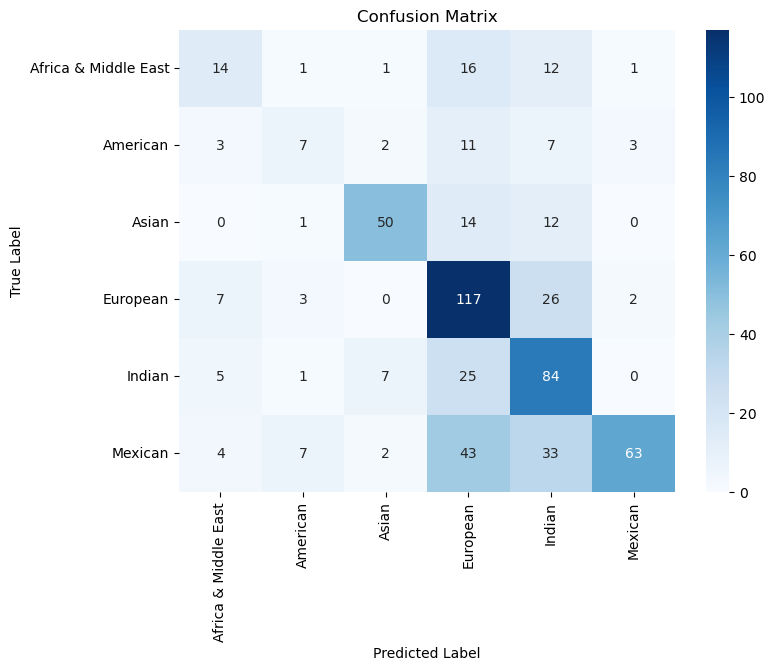

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=9)

knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy with KNN: {knn_accuracy}")

knn_cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.7504215851602024


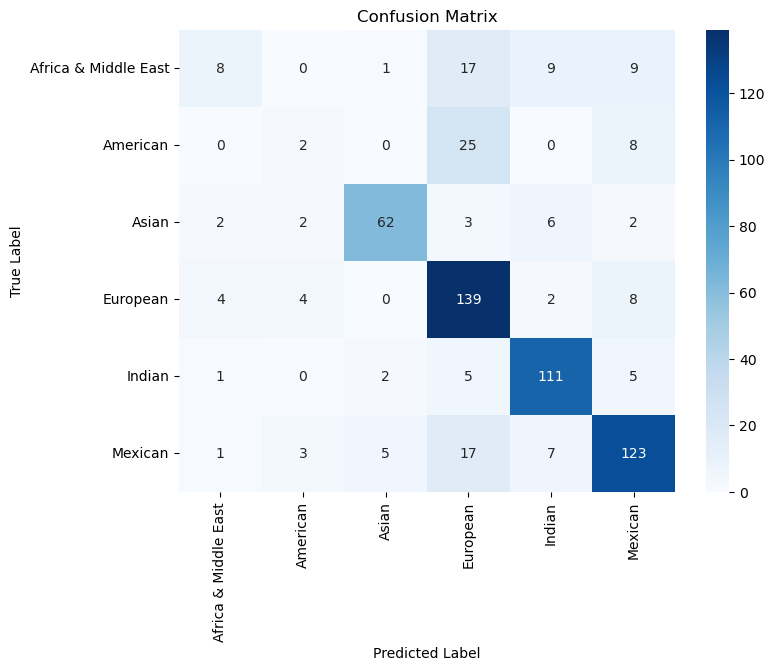

In [234]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with SGD: 0.7841483979763912


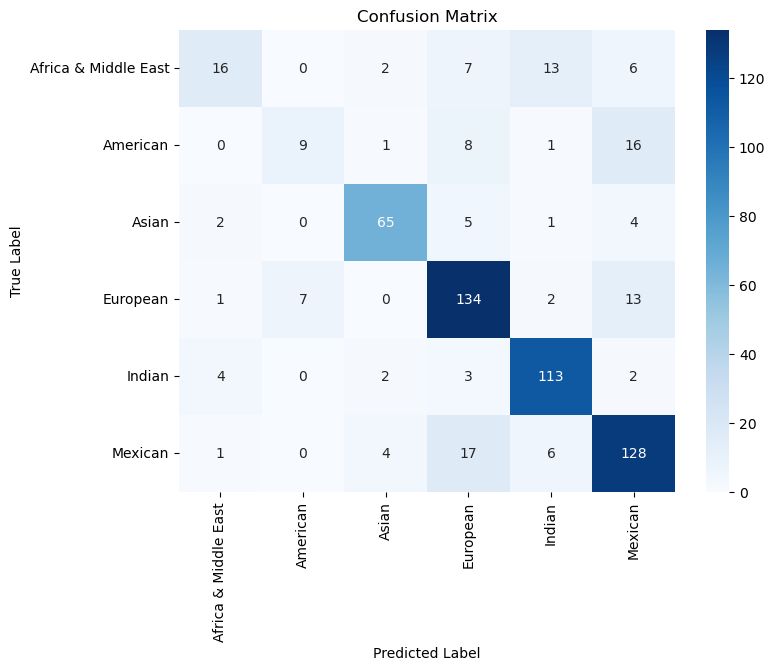

In [251]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log_loss')

sgd_classifier.fit(X_train, y_train)

sgd_predictions = sgd_classifier.predict(X_test)

sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD: {sgd_accuracy}")
cm = confusion_matrix(y_test,sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [165]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

Best Hyperparameters: {'alpha': 0.001, 'max_iter': 500, 'penalty': 'l2'}
Accuracy with SGD (Best Hyperparameters): 0.7393162393162394


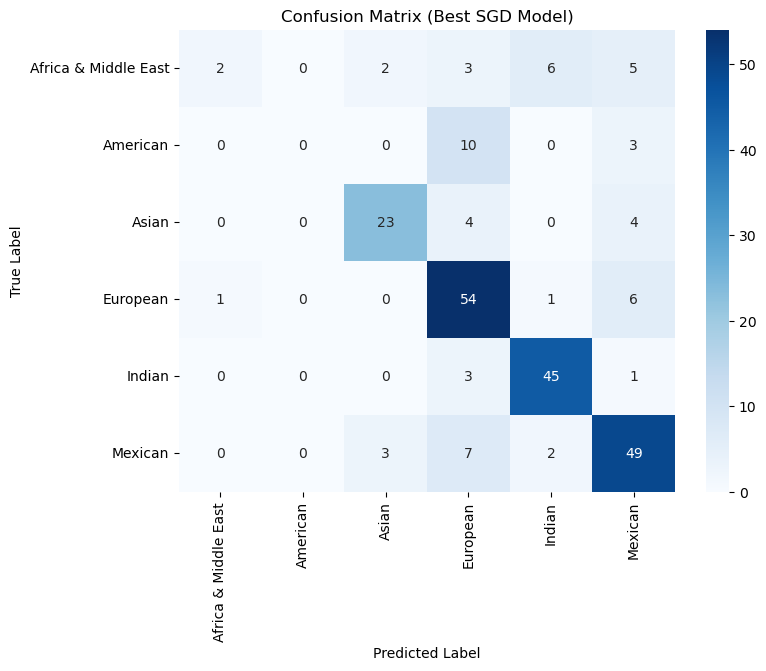

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [ 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [500,1000],
}

sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)

grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_sgd_classifier = grid_search.best_estimator_
sgd_predictions = best_sgd_classifier.predict(X_val)

sgd_accuracy = accuracy_score(y_val, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")

cm = confusion_matrix(y_val, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_sgd_classifier.classes_, yticklabels=best_sgd_classifier.classes_)
plt.title('Confusion Matrix (Best SGD Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [170]:
sgd_predictions = best_sgd_classifier.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")


Accuracy with SGD (Best Hyperparameters): 0.7791095890410958


Accuracy with NB: 0.761986301369863


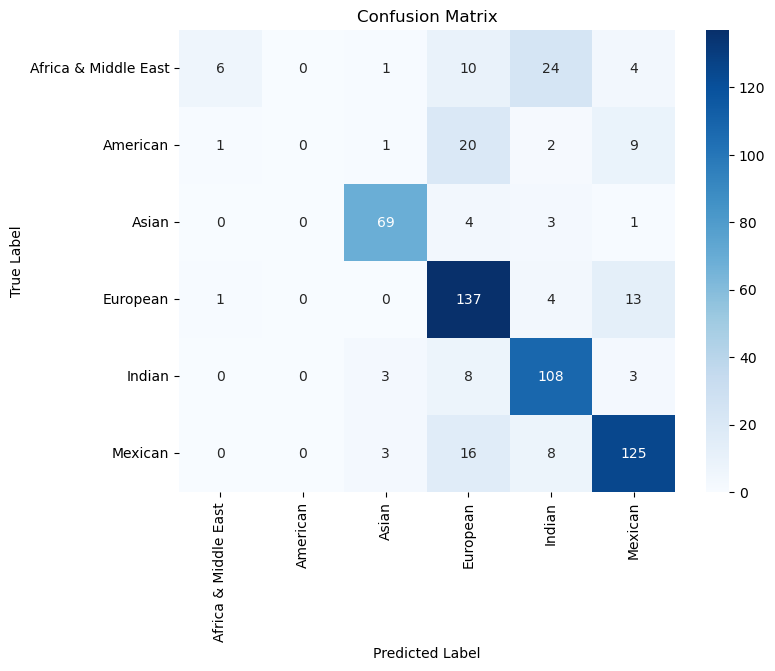

In [153]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy with NB: {nb_accuracy}")
cm = confusion_matrix(y_test,nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with XGBoost: 0.760539629005059


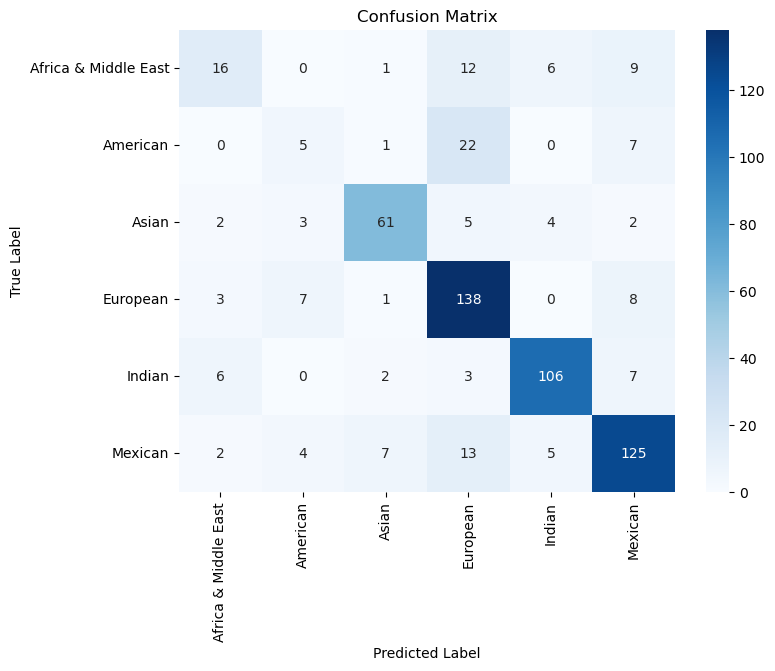

In [247]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train_encoded)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
print(f"Accuracy with XGBoost: {xgb_accuracy}")
cm = confusion_matrix(y_test_encoded,xgb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [178]:
import pickle

In [252]:
with open('sgd_classifier_Cuisines.pkl', 'wb') as model_file:
    pickle.dump(sgd_classifier, model_file)

In [253]:
with open('sgd_classifier_Cuisines.pkl', 'rb') as model_file:
     sgd_classifier = pickle.load(model_file)

In [254]:
new_ingredients = ['paprika']

new_ingredients_str = ' '.join(new_ingredients)

new_tfidf_features = tfidf_vectorizer.transform([new_ingredients_str])
new_tfidf_features

class_probabilities = sgd_classifier.predict_proba(new_tfidf_features)

for class_label, probabilities in zip(sgd_classifier.classes_, class_probabilities[0]):
    print(f"Probability for {class_label}: {probabilities:.4f}")



Probability for Africa & Middle East: 0.1830
Probability for American: 0.1387
Probability for Asian: 0.1033
Probability for European: 0.2903
Probability for Indian: 0.1683
Probability for Mexican: 0.1164


/Users/harishneelam/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [220]:
top_indices = [i for i, prob in enumerate(class_probabilities[0]) if prob > 0.30]

top_classes = sgd_classifier.classes_[top_indices]

if len(top_classes)==0:
    top_indices = class_probabilities.argsort()[0][-1:][::-1]
    top_classes = sgd_classifier.classes_[top_indices]
    
top_classes

array(['American'], dtype='<U20')